# Travail pratique 1 - IFT 3700
##### Remis le 22 novembre 2020 par Rym Bach et Laurier Lavoie-Giasson
## Introduction
Dans le cadre de ce travail, on s'intéresse à la précision des différentes techniques de classification vues en classe, et de comparer son niveau en utilisant la distance euclidienne ainsi que [...]
## Code
### Installation des packages nécessaires

In [6]:
import sys
!{sys.executable} -m pip install tqdm

### Chargement et prétraitement des jeux de données d'entraînement et de tests

In [7]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import TruncatedSVD





def preprocessing(X, n_dimensions=784):
    #cette fonction sera utilisée pour le prétraitement des données du jeu de données.
    #X doit être une matrice de taille (n,784)
    
    return np.array([np.round(np.divide(X[i], 255.0)) for i in tqdm(range(len(X))) ])
    
def readMNIST(filename, n_dimensions=784):
    #cette fonction lit le fichier de MNIST à l'emplacement fourni et retourne le jeu de
    #données sur lequel on a appliqué la fonction de prétraitement
    data = open(filename)
    csv_file = csv.reader(data)
    data_points = [row for row in csv_file] #pour enlever les headers
    data_points.pop(0)
    #valeurs Y de taille 1 (labels)
    print("Extraction des labels pour", filename)
    Y = np.array([int(data_points[i][0]) for i in tqdm(range(len(data_points)))])
    
    #vecteurs X de taille 784 (arrondis à l'entier le plus près)
    print("Extraction des points de données pour", filename)
    X = np.array([[int(j) for j in data_points[i][1:]] for i in tqdm(range(len(data_points)))])
    X = X.reshape((len(Y),784))
    
    #on retourne un tuple avec les vecteurs x et les valeurs y
    return (preprocessing(X, n_dimensions),Y)

XY_train = readMNIST('mnist_train.csv')
X_train = XY_train[0]
Y_train = XY_train[1]

XY_test = readMNIST('mnist_test.csv')
X_test = XY_test[0]
Y_test = XY_test[1]

FileNotFoundError: [Errno 2] No such file or directory: 'mnist_train.csv'

### _Sanity Check_
Ici on regarde si les données sont encore "saines", c'est à dire si on peut afficher la première lettre du jeu de données

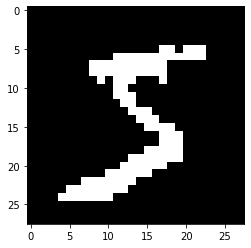

In [3]:
plt.imshow(X_train[0].reshape((28,28)), cmap="gray")
plt.show()

On voit que la lettre apparait bel et bien, on peut donc considérer que le jeu de données a été correctement chargé
### Classification en utilisant l'algorithme K-médoïdes


L'algorithme des k-médoïdes est un algorithme de partitionnement plus robuste vis-à-vis des données aberrantes 
 que celui des k-means , l'algorithme des k-médoïdes minimise l'erreur quadratique 
moyenne qui est la distance entre les points de la classe et le point central  on va 
donc l'appliquer sur nos donnees 


In [3]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedoids import kmedoids 


 
                      
def classify_fmedoide(X_train, Y_train):
    scores = []
    k_range = range(2,15)
    for k in k_range:
        y_pred = KMeans(n_clusters=k).fit_predict(X_train)
        scores.append(silhouette_score(X_train, y_pred))


    plt.plot(k_range, scores)
    plt.xlabel('k')
    plt.ylabel('Score silhouette')
    plt.title('Score silhouette en fonction de k')

return np.array([k_range, scores])

                      
def kmedoide_Euclidienne () :               
    MatrixDeucli = euclidean_distances(X_train)
    tab =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    kmedoidseuclidienne = MatrixDeucli, tab, data_type='distance_matrix')
    kmedoidseuclidienne.process()
    euclidienne_medoids = kmedoidseuclidienne.get_medoids()
    clusters_euclidienne = kmedoidseuclidienne.get_clusters()
    
return np.array([euclidienne_medoids,clusters_euclidienne])  

                      
def kmedoide_distance ()     :               
    matrixSimi = np.array(copy.deepcopy(Y_train).astype(np.float64)
    tab =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    kmedoidsdistance = kmedoids(matrixSimi, tab, data_type='distance_matrix')
    kmedoidsdistance.process()
    distancemedoids = kmedoidsdistance.get_medoids()
    clustersdistance = kmedoidsdistance.get_clusters()
    
return np.array([kmedoidsdistance,clustersdistance]) 








SyntaxError: invalid syntax (<ipython-input-3-9683f1308bae>, line 9)

In [2]:
### Classification en utilisant l'algorithme des K plus proches voisins

In [4]:
from multiprocessing import Process
from multiprocessing.sharedctypes import Array
#on va utiliser ici du multi-processing pour travailler autour du GIL de Python,
#on va démarrer plusieurs processus et travailler sur des variables partagées

def fit_and_score(aX_train, aY_train, aX_test, aY_test, ak, aAccuracy_shared_array):
    
    classifier = KNeighborsClassifier(n_neighbors=ak)
    classifier.fit(aX_train, aY_train)
    return classifier.score(aX_test, aY_test)



def classify_KNN(aX_train, aY_train, aX_test, aY_test, max_neighbors, multi_process=True):
    if multi_process:
        #on crée un tableau partagé de doubles "primitifs" de C pour les résultats
        aX_train_shared=Array('d', aX_train.shape[0]*aX_train.shape[1])
        #on le passe à Numpy pour utilisation à travers l'interface "buffer"
        aX_train_mp=np.frombuffer(aX_train_shared.get_obj()).reshape(aX_train.shape)
        #on copie les valeurs de l'argument dans le tableau partagé
        np.copyto(aX_train_mp, aX_train)
        
        aY_train_shared=Array('d', aY_train.size)
        aY_train_mp=np.frombuffer(aY_train_shared.get_obj())
        np.copyto(aY_train_mp, aY_train)
        
        
        aX_test_shared=Array('d', aX_test.shape[0]*aX_test.shape[1])
        aX_test_mp=np.frombuffer(aX_test_shared.get_obj()).reshape(aX_test.shape)
        np.copyto(aX_test_mp, aX_test)
        
        
        aY_test_shared=Array('d', aY_test.size)
        aY_test_mp=np.frombuffer(aY_test_shared.get_obj())
        np.copyto(aY_test_mp, aY_test)
        
        
        #on crée un tableau partagé de doubles "primitifs" de C pour la précision
        accuracy_array = Array('d', max_neighbors)        
        accuracy = np.frombuffer(accuracy_array.get_obj())
        #on initialise les valeurs à zéro
        np.copyto(accuracy, np.zeros(max_neighbors))
        
        
        k_range = np.array(range(max_neighbors))
        k_range = np.add(np.multiply(k_range, 2), 1)
        processes = []
        final_k_range = []
        
        for i in k_range:
            if k % 2 != 0:
                myprocess=Process(target=fit_and_score, args=(aX_train_mp, aY_train_mp, aX_test_mp, aY_test_mp, i+1, accuracy))
                processes.append(myprocess)
                myprocess.start()
        for i in tqdm(range(len(processes))):
            myprocess=processes[i]
            myprocess.join()
            del myprocess
        return np.array([k_range, accuracy])
    else:
        classifier = KNeighborsClassifier(n_neighbors=1)
        classifier.fit(aX_train, aY_train)
        print(classifier.score(aX_test, aY_test))
        #TODO changer ceci ASAP. Dois aller dormir lol
        
    
resultats_KNN = classify_KNN(X_train, Y_train, X_test, Y_test, 3, True)
plt.plot(resultatsKNN[0], resultatsKNN[1])
plt.xlabel('k')
plt.ylabel('Précision')
plt.title('Précision de la classification en fonction de k');
    

NameError: name 'X_train' is not defined